Bienvenue au sein de ce Jupyter Notebook dédié au projet numéro 5 du parcours de Data Scientist, nommé "Segmentez des clients d'un site e-commerce".

Dans ce quatrième et dernier notebook, je vais vous présenter comment j'ai élaboré le contrat de maintenance de l'algorithme de segmentation des clients pour l'entreprise Olist. Ce contrat de maintenance sera déterminé à l'aide de l'Ajusted Rand Index (ARI), qui permettra de déterminer à quelle fréquence l'algorithme devra être actualisé afin de garder une performance optimale.

In [3]:
import pandas as pd
df_final_merged_7=pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/Données/df_final_merged_7.csv')
df_final_merged_7.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,credit_card,8,252.25


In [4]:
df_maintenance = df_final_merged_7.copy()
df_orders_maintenance=df_maintenance.loc[:,['customer_unique_id','order_id','Somme des achats','days_diff','review_score','Number_of_days_of_delay','order_purchase_timestamp','Nombre achats effectués']]
df_orders_maintenance.head()

,customer_unique_id,order_id,Somme des achats,days_diff,review_score,Number_of_days_of_delay,order_purchase_timestamp,Nombre achats effectués
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,124.99,474,4,-11.0,2017-05-16 15:05:35,1
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,289.00,233,5,-8.0,2018-01-12 20:48:24,1
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,106,5,1.0,2018-05-19 16:07:45,1
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,149.94,173,5,-13.0,2018-03-13 16:06:38,1
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,35,5,-6.0,2018-07-29 09:51:30,1


In [8]:
df_orders_maintenance['order_purchase_timestamp'] = pd.to_datetime(df_orders_maintenance['order_purchase_timestamp'])


In [9]:
df_orders_maintenance=df_orders_maintenance.dropna(subset=['Number_of_days_of_delay'])
df_orders_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113209 entries, 0 to 115608
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        113209 non-null  object        
 1   order_id                  113209 non-null  object        
 2   Somme des achats          113209 non-null  float64       
 3   days_diff                 113209 non-null  int64         
 4   review_score              113209 non-null  int64         
 5   Number_of_days_of_delay   113209 non-null  float64       
 6   order_purchase_timestamp  113209 non-null  datetime64[ns]
 7   Nombre achats effectués   113209 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 7.8+ MB


**Modélisation à t0**

In [10]:
from datetime import timedelta

"""
    Cette fonction extrait et agrège les données clients pour une période donnée.

    Paramètres:
        ti (datetime): L'horodatage de fin de la période.
        orders (DataFrame): Le DataFrame contenant les données de commande.

    Retourne:
        DataFrame: Un DataFrame contenant les données clients agrégées pour la période.
    """

def period_data(ti, orders):
    orders_i = orders.loc[orders['order_purchase_timestamp'] < ti, :]

    date_i = orders_i["order_purchase_timestamp"].dt\
        .date.sort_values().iloc[-1] + timedelta(days=1)
    orders_i['order_recency_days'] = orders_i[
        "order_purchase_timestamp"].dt.date.apply(
        lambda x: date_i - x).dt.days

    X_i = orders_i.groupby('customer_unique_id').agg(
        recency=("order_recency_days", 'min'),
        frequency=("order_id", 'count'),
        monetory=("Somme des achats", 'sum'),
        avis=("review_score", lambda x: round(x.mean())),
        nbr_jour_retard_livraison=("Number_of_days_of_delay",
                            lambda x: round(x.mean())),
        nbr_total_article=("Nombre achats effectués",
                           lambda x: round(x.sum())))
    return X_i

In [11]:
import datetime as dt

#Application de la fonction pour la première date de commande présente dans le dataframe
t0 = dt.datetime(2018, 3, 3)
X_0 = period_data(t0, df_orders_maintenance)
X_0.head()

<ipython-input-10-67b48145dff7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_i['order_recency_days'] = orders_i[


,recency,frequency,monetory,avis,nbr_jour_retard_livraison,nbr_total_article
customer_unique_id,,,,,,
0000f46a3911fa3c0805444483337064,358,1,69.00,3,-2,1
0000f6ccb0745a6a4b88665a16c9f078,142,1,25.99,4,-12,1
0004aac84e0df4da2b147fca70cf8255,109,1,180.00,5,-8,1
00053a61a98854899e70ed204dd4bafe,3,2,764.00,1,-10,2
0005e1862207bf6ccc02e4228effd9a0,364,1,135.00,4,-28,1


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pca_0 = PCA(n_components=5).fit(X_0)
model_0 = Pipeline(steps=[('std', StandardScaler()),('kmeans', KMeans(init=pca_0.components_, n_clusters=5, n_init=1))])
model_0.fit(X_0)

Pipeline(steps=[('std', StandardScaler()),
                ('kmeans',
                 KMeans(init=array([[ 5.15903540e-04,  5.11603948e-04,  9.99999489e-01,
        -1.03025815e-04,  3.88016852e-06,  6.95142798e-04],
       [ 9.99810832e-01, -6.58599575e-06, -5.15496807e-04,
         7.84231766e-04, -1.94260785e-02, -2.15584427e-04],
       [ 1.94407834e-02, -1.77168367e-03, -1.41502105e-05,
        -3.71857919e-02,  9.99110235e-01, -3.85644211e-03],
       [ 2.86741785e-04,  3.77275582e-01, -8.41137649e-04,
        -4.97252054e-02,  2.38216473e-03,  9.24761631e-01],
       [-4.45762491e-05, -1.14355961e-02,  6.80383141e-05,
         9.97540644e-01,  3.73326387e-02,  5.82078887e-02]]),
                        n_clusters=5, n_init=1))])

### ARI pour vérifier les résultats et la stabilisation du modèle

In [14]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import adjusted_rand_score

ari_score_ = []
for i in range(0, 20):
    ti = t0 + i*timedelta(days=7)
    X_i = period_data(ti, df_orders_maintenance)
    pca = PCA(n_components=5).fit(X_i)
    model = Pipeline(steps=[('std', StandardScaler()),('kmeans', KMeans(init=pca.components_,n_clusters=5,n_init=1))])
    model.fit(X_i)
    clusters = model.predict(X_i)
    clusters_0 = model_0.predict(X_i)
    ari = adjusted_rand_score(clusters_0, clusters)
    ari_score_.append([i, ari])

ari_score = pd.DataFrame(ari_score_, columns=["period", "ari_score"])
ari_score

,period,ari_score
0,0,1.000000
1,1,0.977262
2,2,0.952931
3,3,0.926572
4,4,0.891213
5,5,0.865957
6,6,0.866066
7,7,0.874854
8,8,0.878676
9,9,0.865700


Ici, nous allons définir la fonction ari_plot, qui va tracer le score ARI au fil du temps et déterminer la semaine de maintenance.

Paramètres:
- seuil (float): Le seuil du score ARI pour déclencher la maintenance.

- ari_score (DataFrame): Le DataFrame contenant les scores ARI.

Retourne:
int: La semaine de maintenance recommandée.   

In [20]:
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def ari_plot(seuil, ari_score):
    x = ari_score.period.values
    y1 = ari_score.ari_score.values
    line_1 = LineString(np.column_stack((x, y1)))
    y2 = seuil*np.ones(len(x))
    line_2 = LineString(np.column_stack((x, y2)))
    intersection = line_1.intersection(line_2)
    x_intersection, y_intersection = intersection.xy
    x_intersection = x_intersection[0]
    y_intersection = y_intersection[0]
    week_maintenance = round(x_intersection)

    print('Mise à jour du modèle :'
          + '{} semaines))'
          .format(week_maintenance))

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=ari_score,
                 x="period",
                 y="ari_score")
    plt.xlabel("Semaine")
    plt.ylabel("Score ARI")
    plt.title("Evolution de la stabilité du modèle K-Means")

    plt.xlim(0, 20)
    plt.ylim(0, 1)
    plt.plot(x_intersection, y_intersection)

    plt.axhline(y=seuil,
                xmin=0,
                xmax=0.57,
                color='red')
    plt.axvline(x=x_intersection,
                ymin=0,
                ymax=seuil,
                alpha=0.6,
                color='red')
    plt.grid(visible=True)
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(20))
    plt.show()
    return week_maintenance

Mise à jour du modèle :12 semaines))


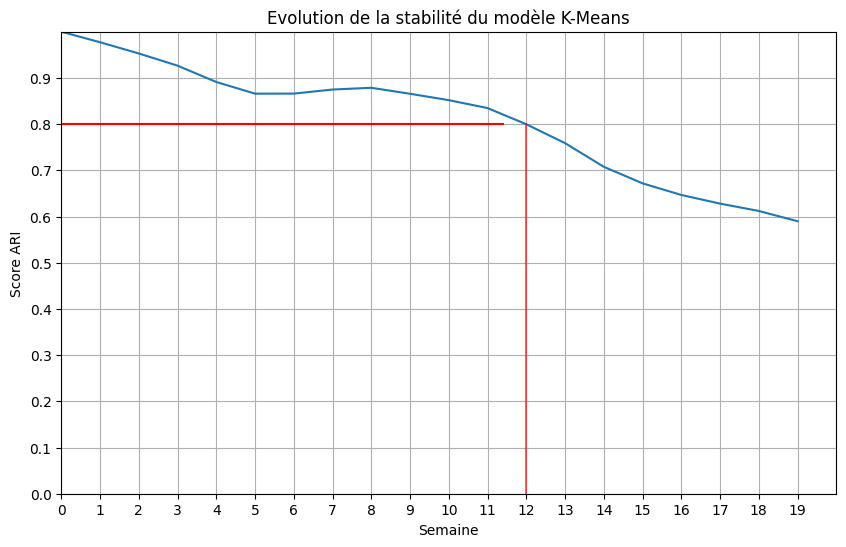

In [16]:
week_maintenance = ari_plot(seuil=0.8, ari_score=ari_score)


L'évolution de l'ARI-score (Adjusted Rand Index) au fil du temps pour un modèle K-means, mesuré sur une période de 20 semaines. Nous observons une diminution progressive de l'ARI-score, indiquant une dégradation de la stabilité du modèle K-means au fil des semaines. Notamment, à la 12ème semaine, marquée par un point rouge, l'ARI-score descend en dessous d'un seuil critique de 0.8. Cela suggère que le modèle commence à perdre significativement en performance à partir de cette période, soulignant la nécessité d'une réévaluation ou d'une mise à jour du modèle pour maintenir son efficacité.